<td>
   <a target="_blank" href="https://labelbox.com" ><img src="https://labelbox.com/blog/content/images/2021/02/logo-v4.svg" width=256/></a>
</td>

<td>
<a href="https://colab.research.google.com/github/Labelbox/labelbox-python/blob/master/examples/extras/classification-confusion-matrix.ipynb" target="_blank"><img
src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
</td>

<td>
<a href="https://github.com/Labelbox/labelbox-python/tree/master/examples/extras/classification-confusion-matrix.ipynb" target="_blank"><img
src="https://img.shields.io/badge/GitHub-100000?logo=github&logoColor=white" alt="GitHub"></a>
</td>

# Classification Confusion matrix

This notebook plots a confusion matrix for a multi-class, single label classification.

It assumes that your project has a number of labels from multiple labelers, where the Annotation Type is Radio.

## Installs

In [ ]:
!pip install -q 'labelbox[data]' scikit-learn matplotlib ipywidgets

## Imports

In [ ]:
# Imports and etc

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import ipywidgets as widgets
import labelbox as lb

def get_labelers():
    labels = project.label_generator()
    labelers = []

    for l in labels:
        if not l.extra['Created By'] in labelers:
            labelers.append(l.extra['Created By'])

    return labelers


def get_paired_labels(labeler1, labeler2):
    labels = project.label_generator()
    l1 = []
    l2 = []
    label_dict = {}
    
    for l in labels:
        if not l.data.uid in label_dict:
            label_dict[l.data.uid] = {}

        # Check if benchmark
        if l.extra['Benchmark ID']:
            label_dict[l.data.uid]['Benchmarks'] = l.annotations[0].value.answer.name

        # Skip labels not created by either of our labelers
        if l.extra['Created By'] != labeler1 and l.extra[
                'Created By'] != labeler2:
            continue

        label_dict[l.data.uid][l.extra['Created By']] = \
            l.annotations[0].value.answer.name

    for uid in label_dict.keys():
        if labeler1 in label_dict[uid] and labeler2 in label_dict[uid]:
            l1.append(label_dict[uid][labeler1])
            l2.append(label_dict[uid][labeler2])

    return l1, l2


def get_label_dict():
    labels = project.label_generator()
    labelers = []
    label_dict = {}

    for l in labels:
        if not l.data.uid in label_dict:
            label_dict[l.data.uid] = {}

        label_dict[l.data.uid][l.extra['Created By']] = \
            l.annotations[0].value.answer.name

        if not l.extra['Created By'] in labelers:
            labelers.append(l.extra['Created By'])

    print(labelers)
    return label_dict, labelers

In [ ]:
# Labelbox API + project and dataset

# Add your api key
API_KEY = None
lb = lb.Client(api_key=API_KEY)

# Add your project and dataset uids here
project = lb.get_project('xxx')
dataset = lb.get_dataset('xxx')

INFO:labelbox.client:Initializing Labelbox client at 'https://api.labelbox.com/graphql'


## Labeler Selection

In [ ]:
# Selectors

labelers = get_labelers()

items = [
    widgets.Dropdown(
        options=['Benchmarks'] + labelers,
        description='Compare this:',
        disabled=False,
    ),
    widgets.Dropdown(
        options=labelers,
        description='Against this:',
        disabled=False,
    )]

    
widgets.VBox(items)

## Confusion Matrix

              precision    recall  f1-score   support

         dog       1.00      0.78      0.88         9
         cat       0.67      0.67      0.67         3
  automobile       0.67      1.00      0.80         4
       truck       1.00      1.00      1.00         2
        frog       0.75      0.75      0.75         4
       horse       0.60      0.75      0.67         4
        deer       0.80      0.80      0.80         5
    airplane       1.00      0.00      0.00         1
        ship       0.75      1.00      0.86         6
        bird       1.00      0.67      0.80         6

    accuracy                           0.80        44
   macro avg       0.82      0.74      0.72        44
weighted avg       0.83      0.80      0.79        44



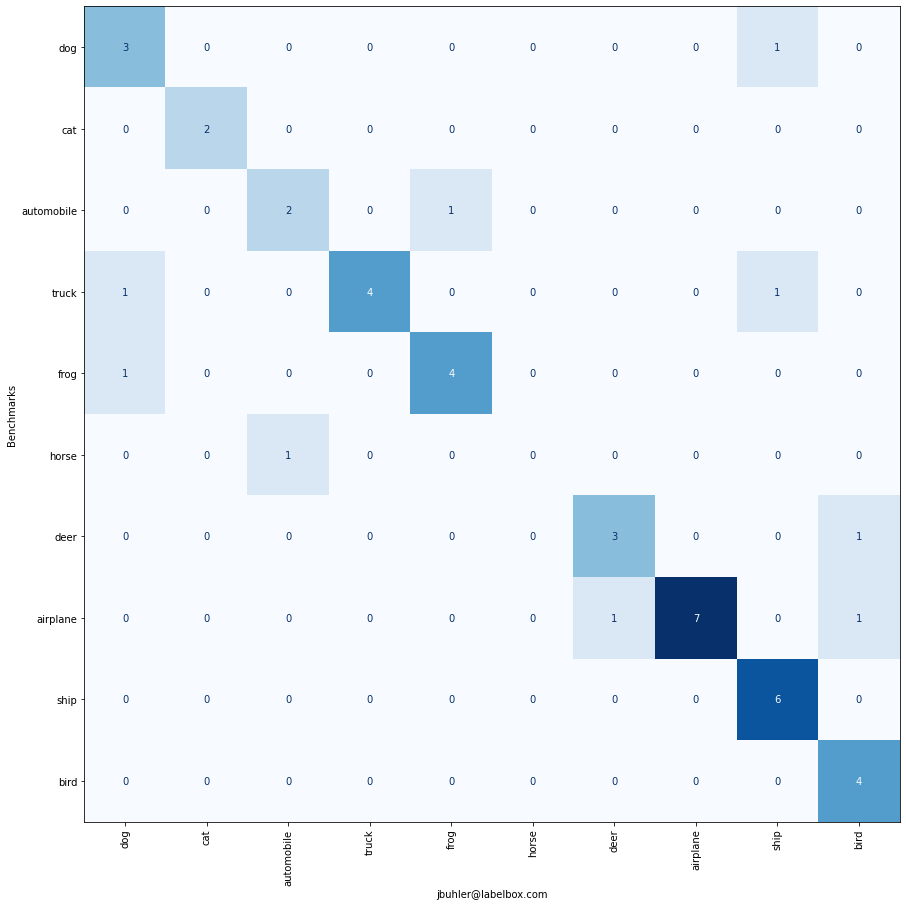

In [ ]:
# Plot Matrix

l1, l2 = get_paired_labels(items[0].value, items[1].value)

fig, ax = plt.subplots(figsize=(15,15))
c = ConfusionMatrixDisplay.from_predictions(l1, l2,
                                        labels=list(set(l1)), sample_weight=None,
                                        normalize=None, display_labels=None, include_values=True,
                                        xticks_rotation='vertical', values_format=None,
                                        cmap='Blues', ax=ax, colorbar=False)

_ = c.ax_.set_xlabel(items[1].value), c.ax_.set_ylabel(items[0].value)

cr = classification_report(
    l1,
    l2,
    output_dict=False,
    target_names=list(set(l1)),
    zero_division=1
)

print(cr)